In [1]:
%matplotlib inline
import pandas as pd
from IPython.core.display import HTML
css=open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>()</style>'.format(css))
titles=pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [2]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [4]:
# Filter the cast DataFrame to include only Superman and Batman characters
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Group by 'year' and count the number of Superman and Batman characters in each year
character_counts = superman_batman_characters.groupby(['year', 'character']).size().unstack(fill_value=0)

# Find the years where Superman characters outnumber Batman characters
superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]

# Count the number of Superman years
num_superman_years = len(superman_years)

print("Number of Superman years:", num_superman_years)

Number of Superman years: 11


# How many years have been "Batman years", with more Batman characters than Superman characters?

In [6]:
# Filter the cast DataFrame to include only Superman and Batman characters
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Group by 'year' and count the number of Superman and Batman characters in each year
character_counts = superman_batman_characters.groupby(['year', 'character']).size().unstack(fill_value=0)

# Find the years where Batman characters outnumber Superman characters
batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]

# Count the number of Batman years
num_batman_years = len(batman_years)

print("Number of Batman years:", num_batman_years)

Number of Batman years: 27


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.

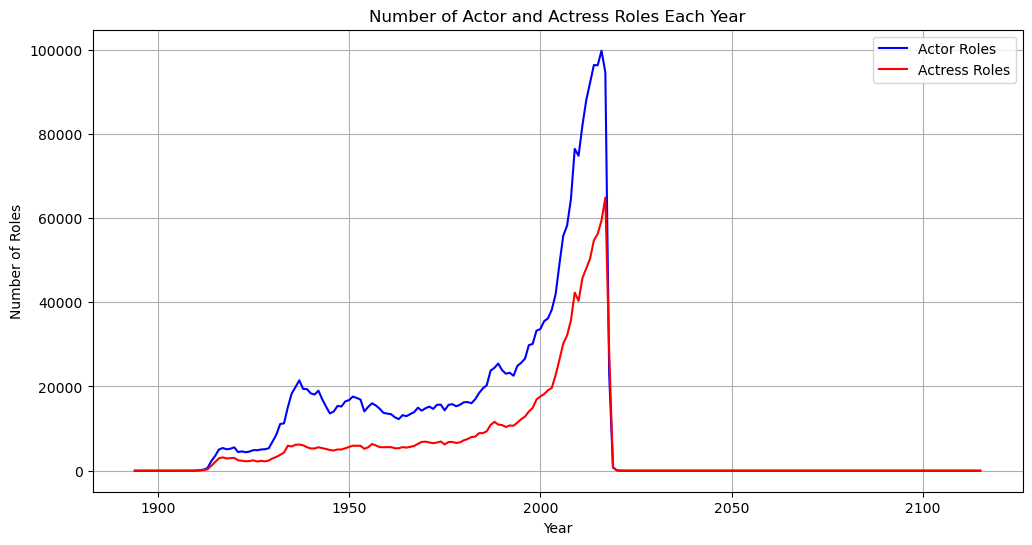

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the cast DataFrame to include only actor and actress roles
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group by 'year' and 'type' (actor or actress) and count the number of roles in each category
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Create a line plot to visualize the number of actor and actress roles each year
plt.figure(figsize=(12, 6))
plt.plot(role_counts.index, role_counts['actor'], label='Actor Roles', color='blue')
plt.plot(role_counts.index, role_counts['actress'], label='Actress Roles', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Figure size 1200x600 with 0 Axes>

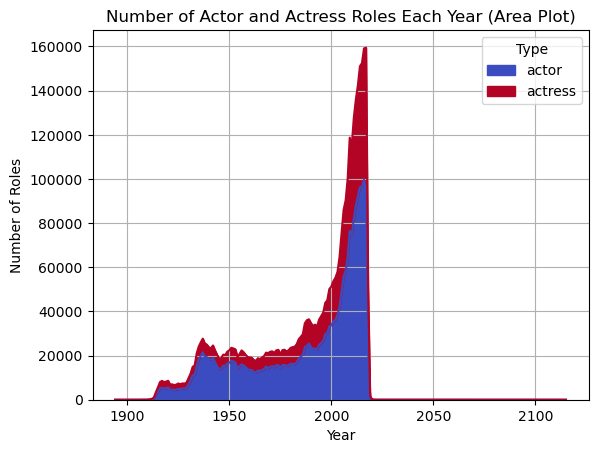

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the cast DataFrame to include only actor and actress roles
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group by 'year' and 'type' (actor or actress) and count the number of roles in each category
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Create an area plot to visualize the number of actor and actress roles each year
plt.figure(figsize=(12, 6))
role_counts.plot.area(stacked=True, colormap='coolwarm')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

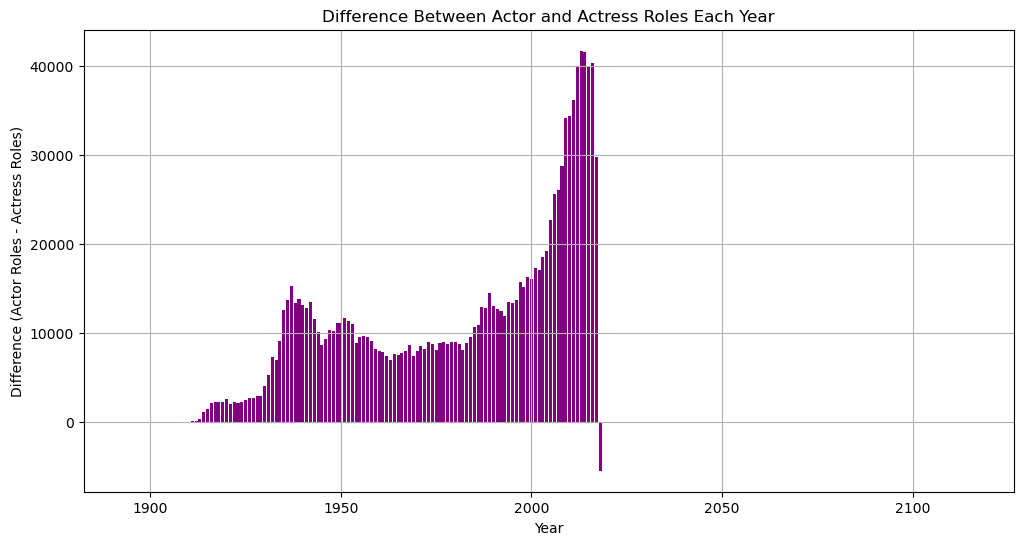

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the cast DataFrame to include only actor and actress roles
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group by 'year' and 'type' (actor or actress) and count the number of roles in each category
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the difference between actor and actress roles for each year
role_difference = role_counts['actor'] - role_counts['actress']

# Create a bar plot to visualize the difference between actor and actress roles each year
plt.figure(figsize=(12, 6))
plt.bar(role_difference.index, role_difference, color='purple')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.grid(True)
plt.show()

# Plot the fraction of roles that have been actor' roles each year in the history of film

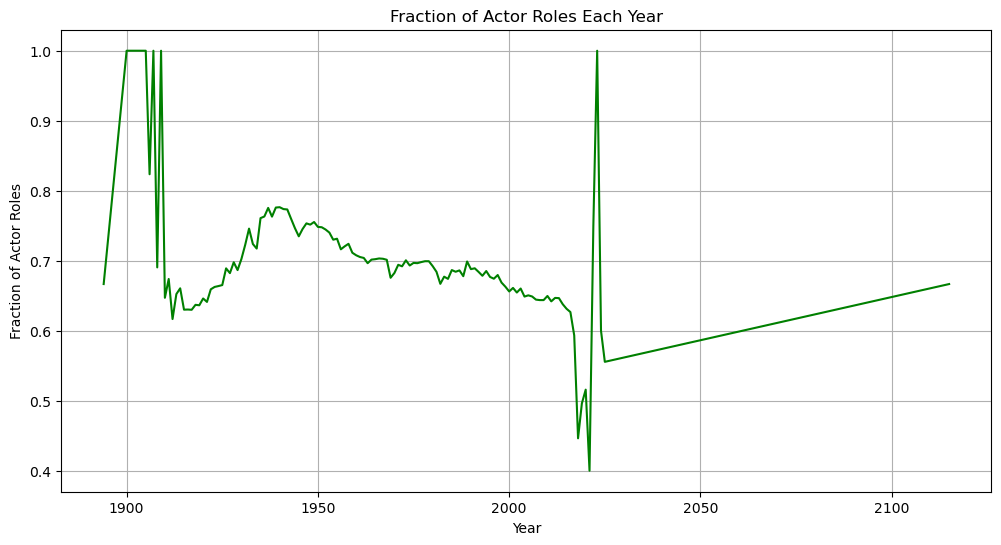

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the cast DataFrame to include only actor and actress roles
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group by 'year' and 'type' (actor or actress) and count the number of roles in each category
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the total number of roles (actor + actress) for each year
total_roles = role_counts['actor'] + role_counts['actress']

# Calculate the fraction of actor roles each year
fraction_actor_roles = role_counts['actor'] / total_roles

# Create a line plot to visualize the fraction of actor roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles, label='Fraction of Actor Roles', color='green')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year')
plt.grid(True)
plt.show()

# Plot the fraction of supporting (n=2) roles that have been actor' roles each year in the history of film

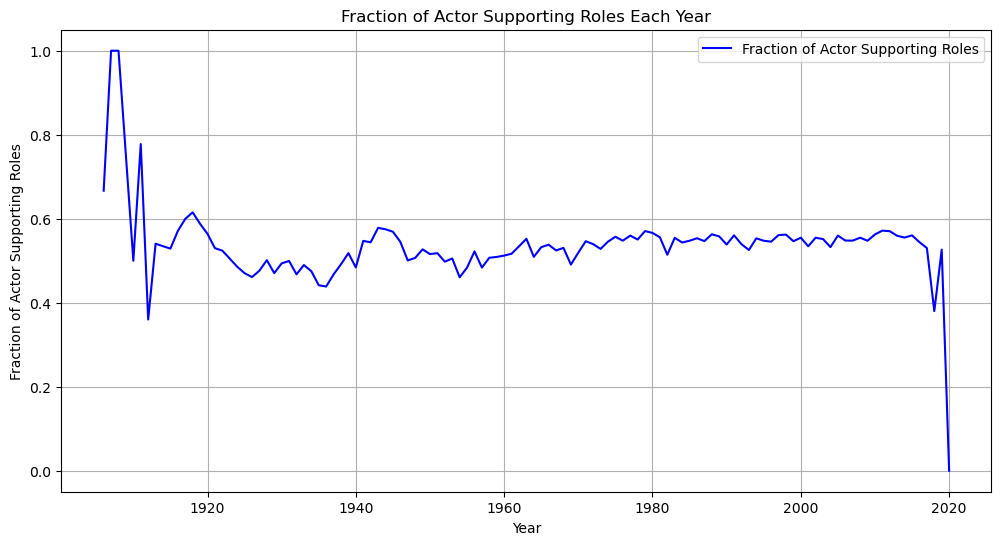

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the cast DataFrame to include only supporting (n=2) roles
supporting_roles = cast[cast['n'] == 2]

# Group by 'year' and 'type' (actor or actress) and count the number of roles in each category
role_counts = supporting_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the total number of supporting roles (actor + actress) for each year
total_supporting_roles = role_counts['actor'] + role_counts['actress']

# Calculate the fraction of actor supporting roles each year
fraction_actor_supporting_roles = role_counts['actor'] / total_supporting_roles

# Create a line plot to visualize the fraction of actor supporting roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_supporting_roles.index, fraction_actor_supporting_roles, label='Fraction of Actor Supporting Roles', color='blue')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Supporting Roles')
plt.title('Fraction of Actor Supporting Roles Each Year')
plt.grid(True)
plt.legend()
plt.show()

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actorroles for each year in the history of film.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset and preprocess it (steps 1 and 2)
# Assume you have a DataFrame 'df' with columns: 'Year', 'Rank', 'TotalRoles', 'ActorRoles'

# Filter the data for each rank (n=1, n=2, n=3)
df = pd.read_csv('titles.csv')
rank_1 = df[df['Rank'] == 1]
rank_2 = df[df['Rank'] == 2]
rank_3 = df[df['Rank'] == 3]

# Calculate the fraction of actor roles for each rank and year (step 3)
rank_1['Fraction'] = rank_1['ActorRoles'] / rank_1['TotalRoles']
rank_2['Fraction'] = rank_2['ActorRoles'] / rank_2['TotalRoles']
rank_3['Fraction'] = rank_3['ActorRoles'] / rank_3['TotalRoles']

# Create the plot (step 4)
plt.figure(figsize=(10, 6))
plt.plot(rank_1['Year'], rank_1['Fraction'], label='Rank 1')
plt.plot(rank_2['Year'], rank_2['Fraction'], label='Rank 2')
plt.plot(rank_3['Year'], rank_3['Fraction'], label='Rank 3')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.legend()
plt.title('Fraction of Actor Roles by Rank Over the Years')
plt.show()